In [1]:
# PART III: DATA PREPARATION

# Import any necessary libraries & packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report


# Load dataset into pandas data frame using read_csv command
df = pd.read_csv(r'C:\Users\ashle\Downloads\churn_clean.csv', keep_default_na=False)

In [2]:
# Explore the dataset in order to determine how to evaluate the input data by using the head() command
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# Rename the survey columns to describe the variables better
df.rename(columns= {'Item1': 'Responses',
                    'Item2': 'Fixes',
                    'Item3': 'Replacements',
                    'Item4': 'Reliability',
                    'Item5': 'Options',
                    'Item6': 'Respectfulness',
                    'Item7': 'Courteous',
                    'Item8': 'Listening'}, 
          inplace=True)

# Print column names to check corrections made
print(df.columns)

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Responses', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')


In [4]:
# Calculate total null values and total duplicate values in the dataset
total_nulls = df.isna().sum().sum()
total_dupes = df.duplicated().sum()

print(f"Total Nulls: {total_nulls}\nTotal Duplicate Records: {total_dupes}")

Total Nulls: 0
Total Duplicate Records: 0


In [5]:
# Drop columns that are unnecessary for the analysis
to_drop = ['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip',
           'Lat','Lng','Population','Area','TimeZone','Job','Age','Marital','Gender','PaperlessBilling',
           'PaymentMethod']
df.drop(columns=to_drop,inplace=True)

df.head()

,Children,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,0,28561.99,No,7.978323,10,0,1,No,One year,Yes,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,21704.77,Yes,11.699080,12,0,1,Yes,Month-to-month,No,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,9609.57,No,10.752800,9,0,1,Yes,Two Year,Yes,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,18925.23,No,14.913540,15,2,0,Yes,Two Year,No,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,40074.19,Yes,8.147417,16,2,1,No,Month-to-month,Yes,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
# Find the summary statistics for numerical variables
df.describe()

,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
# Create a list of the categorical variables
cat_cols = ['Churn','Techie','Contract','Port_modem','Tablet',
            'InternetService','Phone','Multiple','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# Find the summary statistics for categorical variables            
print('PROPORTION OF EACH CATEGORICAL VARIABLE')
for col in cat_cols:
    freq = df[col].value_counts(normalize=True).reset_index()
    freq.columns = [f'{col}','Proportion']
    print('-'*40+'\n',freq)

PROPORTION OF EACH CATEGORICAL VARIABLE
----------------------------------------
   Churn  Proportion
0    No       0.735
1   Yes       0.265
----------------------------------------
   Techie  Proportion
0     No      0.8321
1    Yes      0.1679
----------------------------------------
          Contract  Proportion
0  Month-to-month      0.5456
1        Two Year      0.2442
2        One year      0.2102
----------------------------------------
   Port_modem  Proportion
0         No      0.5166
1        Yes      0.4834
----------------------------------------
   Tablet  Proportion
0     No      0.7009
1    Yes      0.2991
----------------------------------------
   InternetService  Proportion
0     Fiber Optic      0.4408
1             DSL      0.3463
2            None      0.2129
----------------------------------------
   Phone  Proportion
0   Yes      0.9067
1    No      0.0933
----------------------------------------
   Multiple  Proportion
0       No      0.5392
1      Yes      0

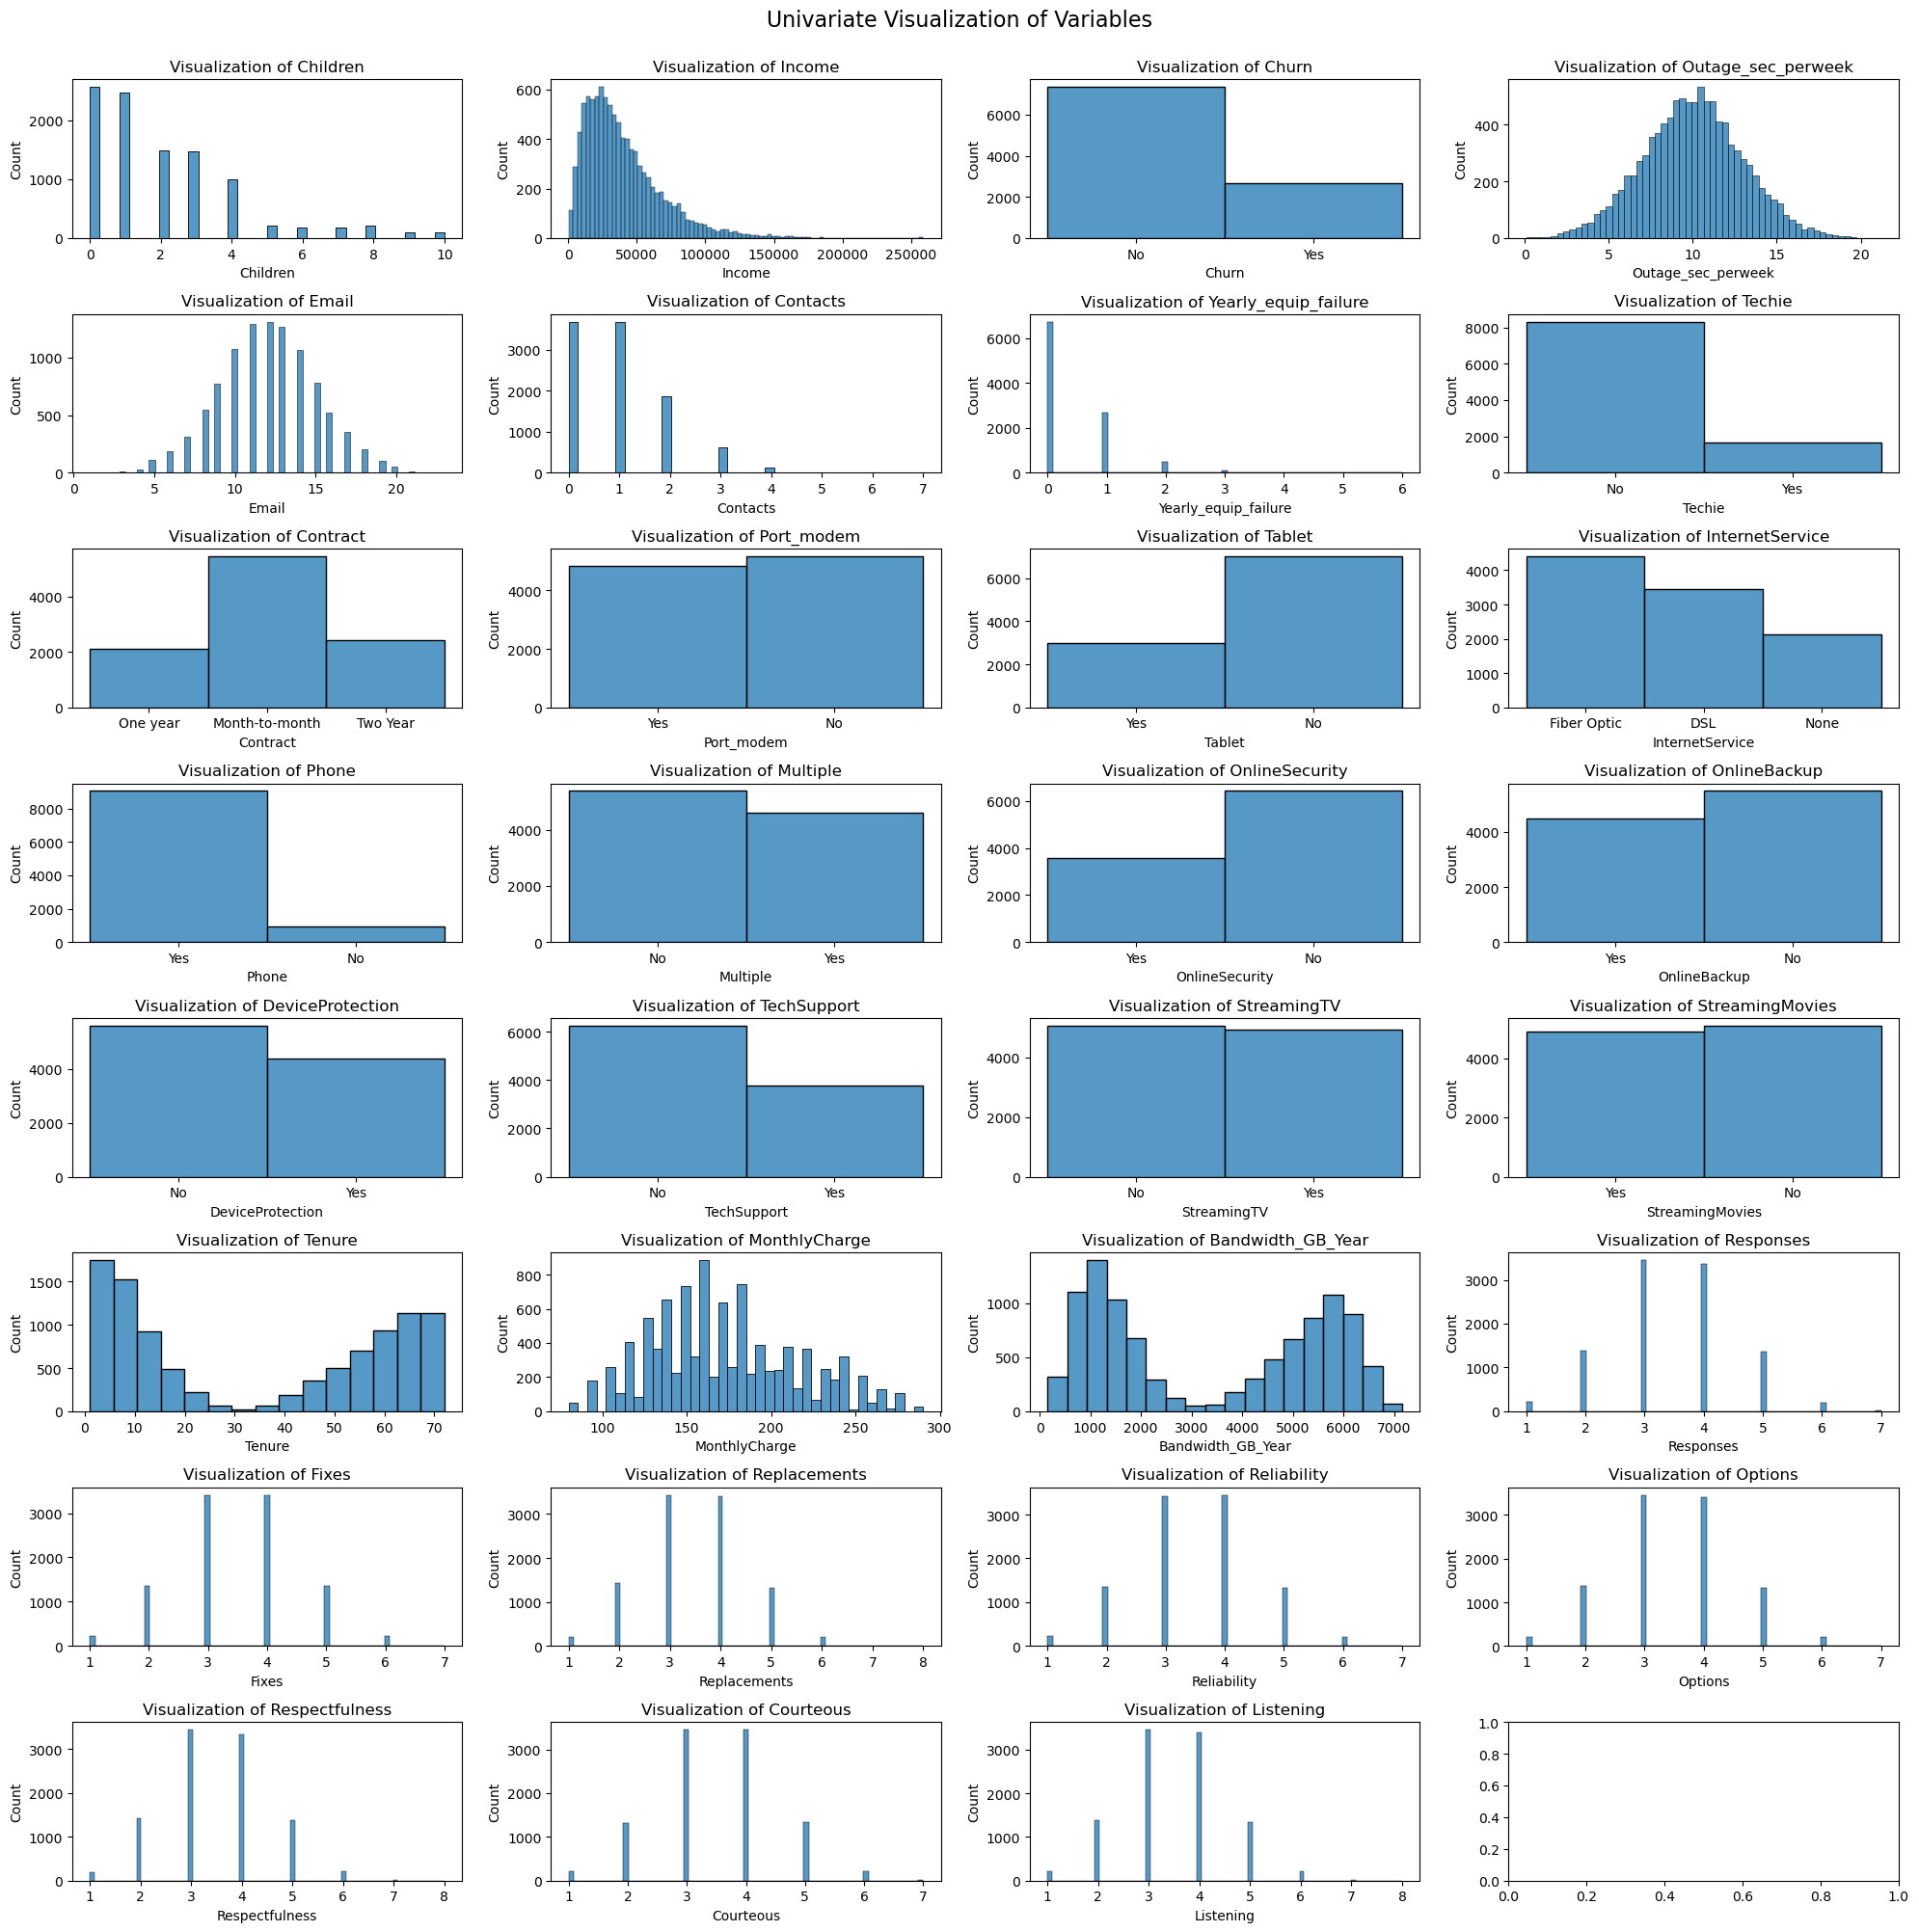

In [8]:
# UNIVARIATE VISUALIZATIONS

# Display the univariate visualization for all independent (predicting) variables and dependent (target) variable
fig_rows, fig_cols = (8, 4)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20, 20))
i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.histplot(data=df, x=df.columns[i], ax=axes[row][col])
            axes[row][col].set_title(f"Visualization of {df.columns[i]}")
            i += 1
        except IndexError:
            break
plt.suptitle("Univariate Visualization of Variables", fontsize=16, y=1)
plt.tight_layout()
plt.show()

In [9]:
# Drop Tenure or Bandwidth_GB_Year because of multicollinearity from previous analysis
df = df.drop('Bandwidth_GB_Year', axis = 1)

In [10]:
# Reformat the columns to have 3 decimal places
df['Outage_sec_perweek'] = df.Outage_sec_perweek.round(3)
df['MonthlyCharge'] = df.MonthlyCharge.round(3)
df['Tenure'] = df.Tenure.round(3)

# Create dummy variables where "Yes" is represented by 1 & "No" is represented by 0
df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]
df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in df['Techie']]
df['DummyContract'] = [1 if v == 'Two Year' else 0 for v in df['Contract']]
df['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in df['Port_modem']]
df['DummyTablet'] = [1 if v == 'Yes' else 0 for v in df['Tablet']]
df['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in df['InternetService']]
df['DummyPhone'] = [1 if v == 'Yes' else 0 for v in df['Phone']]
df['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in df['Multiple']]
df['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in df['OnlineSecurity']]
df['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in df['OnlineBackup']]
df['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in df['DeviceProtection']]
df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in df['TechSupport']]
df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in df['StreamingTV']]
df['DummyStreamingMovies'] = [1 if v == 'Yes' else 0 for v in df['StreamingMovies']]

# Drop the original categorical columns
df = df.drop(columns=['Churn','Techie','Contract','Port_modem','Tablet','InternetService','Phone','Multiple',
                      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

# Check the new data frame
df

,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Responses,Fixes,...,DummyTablet,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyStreamingMovies
0,0,28561.99,7.978,10,0,1,6.796,172.456,5,5,...,1,1,1,0,1,1,0,0,0,1
1,1,21704.77,11.699,12,0,1,1.157,242.633,3,4,...,1,1,1,1,1,0,0,0,1,1
2,4,9609.57,10.753,9,0,1,15.754,159.948,4,4,...,0,0,1,1,0,0,0,0,0,1
3,1,18925.23,14.914,15,2,0,17.087,119.957,4,4,...,0,0,1,0,1,0,0,0,1,0
4,0,40074.19,8.147,16,2,1,1.671,149.948,4,4,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,55723.74,9.416,12,2,0,68.197,159.979,3,2,...,1,0,1,1,0,1,1,0,0,0
9996,4,34129.34,6.741,15,2,0,61.040,207.481,4,5,...,0,1,1,1,1,1,1,0,1,0
9997,1,45983.43,6.591,10,0,0,47.417,169.974,4,4,...,0,1,1,1,1,1,0,0,0,0
9998,1,16667.58,12.072,14,1,0,71.096,252.624,4,4,...,1,1,0,1,0,0,0,1,1,1


In [11]:
# Extract the cleaned dataset
df.to_csv('knn_clean.csv', index=False)

In [12]:
# PART IV: ANALYSIS

# Load dataset into pandas data frame
churn_df = pd.read_csv(r'C:\Users\ashle\Downloads\Churn D209\knn_clean.csv',keep_default_na=False)

In [13]:
# Set the predictor variables & target variable
y = churn_df["DummyChurn"]
X = churn_df.drop(columns=["DummyChurn"])

# Initialize the class and call fit_transform
skbest = SelectKBest(score_func=f_classif, k='all') 
X_new = skbest.fit_transform(X, y)

# Find p-values to select statistically significant features
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
features_to_keep = p_values['Feature'][p_values['p_value'] < .05]

# Print the name of the selected features 
print("Selected Features:")
print(features_to_keep)

Selected Features:
7             MonthlyCharge
6                    Tenure
28     DummyStreamingMovies
27         DummyStreamingTV
17            DummyContract
22            DummyMultiple
16              DummyTechie
20     DummyInternetService
25    DummyDeviceProtection
24        DummyOnlineBackup
21               DummyPhone
Name: Feature, dtype: object


In [14]:
# Create a new dataframe with the selected features
X_skbest = X[features_to_keep]

# Calculate the VIF to check for multicollinearity
vif = pd.DataFrame()
vif["Feature"] = X_skbest.columns
vif["VIF"] = [variance_inflation_factor(X_skbest.values, i) for i in range(X_skbest.shape[1])]

# Print the VIFs
print(vif)

                  Feature        VIF
0           MonthlyCharge  59.123125
1                  Tenure   2.646306
2    DummyStreamingMovies   5.290966
3        DummyStreamingTV   4.325467
4           DummyContract   1.319610
5           DummyMultiple   3.228777
6             DummyTechie   1.201250
7    DummyInternetService   2.600339
8   DummyDeviceProtection   2.073906
9       DummyOnlineBackup   2.544588
10             DummyPhone   9.090603


In [15]:
# Run the model after the removal of "MonthlyCharge" since it had a high VIF (greater than 10)
X_skbest = X[features_to_keep].drop(columns="MonthlyCharge")
vif = pd.DataFrame()
vif["Feature"] = X_skbest.columns
vif["VIF"] = [variance_inflation_factor(X_skbest.values, i) for i in range(X_skbest.shape[1])]

print(vif)

                 Feature       VIF
0                 Tenure  2.456814
1   DummyStreamingMovies  1.855791
2       DummyStreamingTV  1.857582
3          DummyContract  1.302950
4          DummyMultiple  1.772117
5            DummyTechie  1.189112
6   DummyInternetService  1.709921
7  DummyDeviceProtection  1.694815
8      DummyOnlineBackup  1.743520
9             DummyPhone  4.883828


In [16]:
X_skbest.columns

Index(['Tenure', 'DummyStreamingMovies', 'DummyStreamingTV', 'DummyContract',
       'DummyMultiple', 'DummyTechie', 'DummyInternetService',
       'DummyDeviceProtection', 'DummyOnlineBackup', 'DummyPhone'],
      dtype='object')

In [17]:
# Split the data into X & y
y = df.DummyChurn
X = df[['Tenure', 'DummyStreamingMovies', 'DummyStreamingTV', 'DummyContract',
       'DummyMultiple', 'DummyTechie', 'DummyInternetService',
       'DummyDeviceProtection', 'DummyOnlineBackup', 'DummyPhone']]

In [18]:
# Create the training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [19]:
# Save the training and testing sets as csv files
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [20]:
# Determine the best k value
knn = KNeighborsClassifier()
k_range = list(range (1,30))
param_grid = dict(n_neighbors=k_range)

#Define the parameter range
knn_cv = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy',return_train_score=False,verbose=1)

#Fit the model for grid search
knn_cv.fit(X_train, y_train)

print('The best k value is: ')
print(knn_cv.best_params_)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
The best k value is: 
{'n_neighbors': 23}


In [21]:
# Fit the KNN model using grid search result of k = 23
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [22]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1442
           1       0.76      0.64      0.69       558

    accuracy                           0.84      2000
   macro avg       0.81      0.78      0.79      2000
weighted avg       0.84      0.84      0.84      2000



In [23]:
# Print the confusion matrix of the model
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1327  115]
 [ 202  356]]


In [25]:
# Print the accuracy scores
print('The accuracy of the model is: ', knn.score(X_test, y_test))
print('The accuracy of the training model is: ', knn.score(X_train, y_train))

The accuracy of the model is:  0.8415
The accuracy of the training model is:  0.867875


In [26]:
# Print the AUC of the model
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]
print('The area under the curve (AUC) is: ', roc_auc_score(y_test, y_pred_prob))

The area under the curve (AUC) is:  0.90030709538226


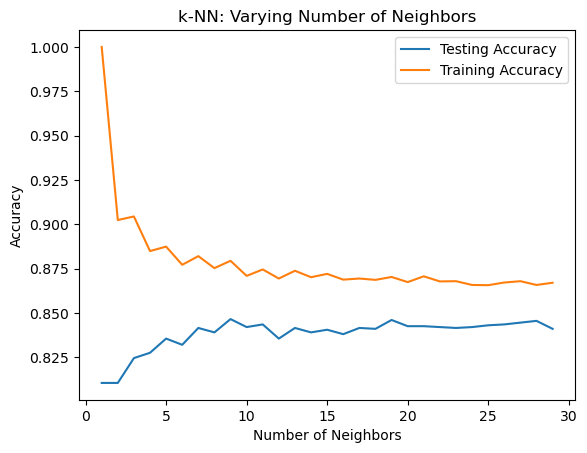

In [27]:
# Model complexity curve
neighbors = np. arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate (neighbors):
    
    #Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the classifier to the training data
    knn.fit(X_train,y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)


#Generate plot
plt.title ('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot (neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [29]:
# Compute the area under the Receiver Operating Characteristic Curve
auc_roc = roc_auc_score(y_test, y_pred_prob)
print('AUC-ROC score: ', auc_roc)

AUC-ROC score:  0.90030709538226


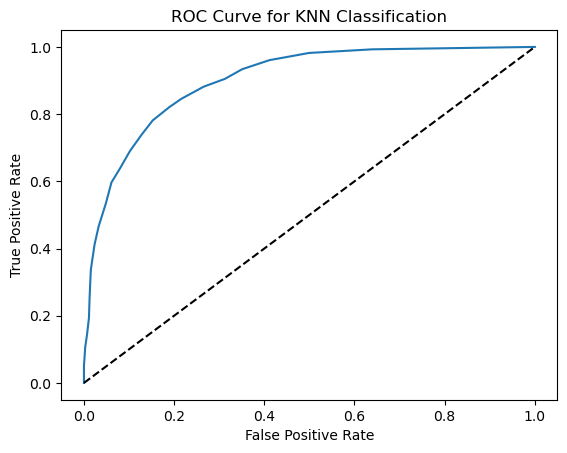

In [30]:
# Generate plot for ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()